# Preprocessing

In [1]:
from tqdm import tqdm

## Obtain the data

In [2]:
# Download the tar.gz file
!curl - O https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20_newsgroups.tar.gz

curl: option -: is unknown
curl: try 'curl --help' or 'curl --manual' for more information


In [3]:
# Uncompress the file
!tar xzf 20_newsgroups.tar.gz

tar: Error opening archive: Failed to open '20_newsgroups.tar.gz'


In [4]:
# Remove the compressed file
!rm 20_newsgroups.tar.gz

rm: 20_newsgroups.tar.gz: No such file or directory


## Load the data

In [5]:
import os

files_list = os.listdir("20_newsgroups")
files_list

['talk.politics.mideast',
 'rec.autos',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.med',
 'talk.politics.misc',
 'rec.motorcycles',
 'comp.windows.x',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'talk.politics.guns',
 'sci.space',
 'soc.religion.christian',
 'misc.forsale',
 'talk.religion.misc']

In [6]:
def get_file_content(filename, encoding):
    with open(filename, encoding=encoding) as f:
        return f.read()


def load_20_newsgroups_files():
    """
    Returns a dict with the keys being the class to predict, and the values being a list of strings,
    where each string is a file of that class.
    """
    !rm 20_newsgroups/.DS_Store  # Removing Mac file

    files_dict = {}

    for directory in os.listdir('20_newsgroups'):
        files_dict[directory] = []

        for file in os.listdir('20_newsgroups/' + directory):
            file_content = get_file_content(
                '20_newsgroups/' + directory + '/' + file, 'latin1')
            files_dict[directory].append(file_content)

    return files_dict


def print_some_files(files_dict):
    """
    Prints some text files from the corpus.
    """
    print('File 1\n_______\n')
    print(files_dict['sci.med'][1])
    print('\n\nFile 2\n_______\n')
    print(files_dict['sci.electronics'][0])
    print('\n\nFile 3\n_______\n')
    print(files_dict['rec.autos'][16])

In [7]:
files_dict = load_20_newsgroups_files()

rm: 20_newsgroups/.DS_Store: No such file or directory


In [8]:
files_dict.keys()

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])

In [9]:
print_some_files(files_dict)

File 1
_______

Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!zaphod.mps.ohio-state.edu!saimiri.primate.wisc.edu!zazen!uwec.edu!nyeda
From: nyeda@cnsvax.uwec.edu (David Nye)
Newsgroups: sci.med
Subject: Re: seizures ( infantile spasms )
Message-ID: <1993Apr20.191250.6144@cnsvax.uwec.edu>
Date: 20 Apr 93 19:12:50 -0600
Organization: University of Wisconsin Eau Claire
Lines: 19

[reply to dufault@lftfld.enet.dec.com (MD)]
 
>After many metabolic tests, body structure tests, and infection/virus
>tests the doctors still do not know quite what type of siezures he is
>having (although they do have alot of evidence that it is now pointing
>to infantile spasms ).  This is where we stand right now....As I know
>now, these particular types of disorders are still not really well
>understood by the medical community.
 
Infantile spasms have been well understood for quite some time now.  You
are seeing a pediatric neurologist, 

## Preprocess the data

In [10]:
def apply_function_to_files(files_dict, function):
    """
    Applies the given function to each of the text files in the given corpus,
    and returns a copy of it, without modifying the given one.

    Parameters
    ----------
    function : function
        The function to be applied to each text file.
        
    Returns
    -------
    files_dict: A copy of the given files_dict with the given function applied to each text in it.
    """
    new_files_dict = dict(files_dict)
    for files_class in new_files_dict:
        new_files_dict[files_class] = [function(file)
                                   for file in new_files_dict[files_class]]
    return new_files_dict

### Remove the header of each file

In [11]:
def strip_header(file_text):
    """
    Returns the file with the header removed.
    The header is the text before the first blank line.
    """
    _before, _blankline, after = file_text.partition('\n\n')
    return after

In [12]:
files_dict = apply_function_to_files(files_dict, strip_header)

In [13]:
print_some_files(files_dict)

File 1
_______

[reply to dufault@lftfld.enet.dec.com (MD)]
 
>After many metabolic tests, body structure tests, and infection/virus
>tests the doctors still do not know quite what type of siezures he is
>having (although they do have alot of evidence that it is now pointing
>to infantile spasms ).  This is where we stand right now....As I know
>now, these particular types of disorders are still not really well
>understood by the medical community.
 
Infantile spasms have been well understood for quite some time now.  You
are seeing a pediatric neurologist, aren't you?  If not, I strongly
recommend it.  There is a new anticonvulsant about to be released called
felbamate which may be particularly helpful for infantile spasms.  As
for learning more about seizures, ask your doctor or his nurse about a
local support group.
 
David Nye (nyeda@cnsvax.uwec.edu).  Midelfort Clinic, Eau Claire WI
This is patently absurd; but whoever wishes to become a philosopher
must learn not to be frightened

### Remove quotes

In [14]:
import re

_QUOTE_RE = re.compile(
    r'(writes in|writes:|wrote:|says:|said:|^In article|^Quoted from|^\||^>)')


def strip_quotes(file_text):
    """
    Returns the file with the quotes removed:
    Lines beginning with the quote characters > or |
    and lines that commonly introduce quoted sections.
    """
    good_lines = [line for line in file_text.split('\n')
                  if not _QUOTE_RE.search(line)]
    return '\n'.join(good_lines)

In [15]:
files_dict = apply_function_to_files(files_dict, strip_quotes)

In [16]:
print_some_files(files_dict)

File 1
_______

[reply to dufault@lftfld.enet.dec.com (MD)]
 
 
Infantile spasms have been well understood for quite some time now.  You
are seeing a pediatric neurologist, aren't you?  If not, I strongly
recommend it.  There is a new anticonvulsant about to be released called
felbamate which may be particularly helpful for infantile spasms.  As
for learning more about seizures, ask your doctor or his nurse about a
local support group.
 
David Nye (nyeda@cnsvax.uwec.edu).  Midelfort Clinic, Eau Claire WI
This is patently absurd; but whoever wishes to become a philosopher
must learn not to be frightened by absurdities. -- Bertrand Russell



File 2
_______


Even easier, my area supports 311.  Dial this and a recording recites your number.
Phone techs use it to verify an installed line.
---
			Gary Gendel
Vice President:				Current consulting assignment:
Genashor Corp				Mentor Graphics Corporation
9 Piney Woods Drive			15 Independence Boulevard
Belle Mead, NJ 08502			Warren, NJ 07059



### Remove signature footer

In [17]:
def strip_footer(file_text):
    """
    Returns the file with the signature block removed:
    We assume that signatures are at the end of the text,
    separated by a blank line or a line made of -.
    """
    lines = file_text.strip().split('\n')
    for line_num in range(len(lines) - 1, -1, -1):
        line = lines[line_num]
        if line.strip().strip('-') == '':
            break

    if line_num > 0:
        return '\n'.join(lines[:line_num])
    else:
        return file_text

In [18]:
files_dict = apply_function_to_files(files_dict, strip_footer)

In [19]:
print_some_files(files_dict)

File 1
_______

[reply to dufault@lftfld.enet.dec.com (MD)]
 
 
Infantile spasms have been well understood for quite some time now.  You
are seeing a pediatric neurologist, aren't you?  If not, I strongly
recommend it.  There is a new anticonvulsant about to be released called
felbamate which may be particularly helpful for infantile spasms.  As
for learning more about seizures, ask your doctor or his nurse about a
local support group.


File 2
_______

Even easier, my area supports 311.  Dial this and a recording recites your number.
Phone techs use it to verify an installed line.
---
			Gary Gendel
Vice President:				Current consulting assignment:
Genashor Corp				Mentor Graphics Corporation
9 Piney Woods Drive			15 Independence Boulevard
Belle Mead, NJ 08502			Warren, NJ 07059


File 3
_______

Sorry I can't help you with your question, but I do have a comment to
make concerning aftermarket A/C units.  I have a Frost-King or Frost-Temp
(forget which) aftermarket unit on my Cavalier,

### Remove stopwords

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
STOPWORDS = set(stopwords.words('english'))

In [22]:
_REPLACE_BY_SPACE_RE = re.compile('[.,;]')


def to_lowercase_and_remove_stopwords(text_file):
    """
    Returns the file with the al characters in lowercase
    and with the stopwords removed.
    """
    text_file = text_file.lower()
    text_file = _REPLACE_BY_SPACE_RE.sub(' ', text_file)
    text_file = ' '.join(word for word in text_file.split()
                         if word not in STOPWORDS)
    return text_file

In [23]:
files_dict = apply_function_to_files(files_dict, to_lowercase_and_remove_stopwords)

In [24]:
print_some_files(files_dict)

File 1
_______

[reply dufault@lftfld enet dec com (md)] infantile spasms well understood quite time seeing pediatric neurologist you? strongly recommend new anticonvulsant released called felbamate may particularly helpful infantile spasms learning seizures ask doctor nurse local support group


File 2
_______

even easier area supports 311 dial recording recites number phone techs use verify installed line --- gary gendel vice president: current consulting assignment: genashor corp mentor graphics corporation 9 piney woods drive 15 independence boulevard belle mead nj 08502 warren nj 07059


File 3
_______

sorry can't help question comment make concerning aftermarket a/c units frost-king frost-temp (forget which) aftermarket unit cavalier quite unhappy fan noisy put much air never aftermarket a/c installed vehicles can't trust quality performance experience - les


### Stemming vs Lemmatization

#### Stemming

In [25]:
from nltk.stem import PorterStemmer

In [26]:
def stem_words(text_file):
    """
    Given a string, it applies the Porter Stemmer to each word of the string.
    """
    porter_stemmer = PorterStemmer()
    return ' '.join(porter_stemmer.stem(word) for word in text_file.split())

In [27]:
files_dict_stemming = apply_function_to_files(files_dict, stem_words)

In [28]:
print_some_files(files_dict_stemming)

File 1
_______

[repli dufault@lftfld enet dec com (md)] infantil spasm well understood quit time see pediatr neurologist you? strongli recommend new anticonvuls releas call felbam may particularli help infantil spasm learn seizur ask doctor nurs local support group


File 2
_______

even easier area support 311 dial record recit number phone tech use verifi instal line --- gari gendel vice president: current consult assignment: genashor corp mentor graphic corpor 9 piney wood drive 15 independ boulevard bell mead nj 08502 warren nj 07059


File 3
_______

sorri can't help question comment make concern aftermarket a/c unit frost-k frost-temp (forget which) aftermarket unit cavali quit unhappi fan noisi put much air never aftermarket a/c instal vehicl can't trust qualiti perform experi - le


#### Lemmatization

In [29]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/carlos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def lemmatize_words(text_file):
    """
    Given a string, it applies the WordNet Lemmatizer to each word of the string.
    """
    wordnet_lemmatizer = WordNetLemmatizer()
    return ' '.join(wordnet_lemmatizer.lemmatize(word) for word in text_file.split())

In [31]:
files_dict_lemmatization = apply_function_to_files(files_dict, lemmatize_words)

In [32]:
print_some_files(files_dict_lemmatization)

File 1
_______

[reply dufault@lftfld enet dec com (md)] infantile spasm well understood quite time seeing pediatric neurologist you? strongly recommend new anticonvulsant released called felbamate may particularly helpful infantile spasm learning seizure ask doctor nurse local support group


File 2
_______

even easier area support 311 dial recording recites number phone tech use verify installed line --- gary gendel vice president: current consulting assignment: genashor corp mentor graphic corporation 9 piney wood drive 15 independence boulevard belle mead nj 08502 warren nj 07059


File 3
_______

sorry can't help question comment make concerning aftermarket a/c unit frost-king frost-temp (forget which) aftermarket unit cavalier quite unhappy fan noisy put much air never aftermarket a/c installed vehicle can't trust quality performance experience - le


# Creating models

## Transform the data to a pandas DataFrame

In [33]:
import pandas as pd

In [34]:
def transform_dict_to_dataframe(files_dict):
    """
    Transforms the files_dict created before to a pandas DataFrame.
    """
    i = 0
    dataframe_dict = {}
    for file_class, files_list in files_dict.items():
        for file in files_list:
            dataframe_dict[i] = [file, file_class]
            i += 1

    return pd.DataFrame.from_dict(dataframe_dict, orient='index', columns=['document', 'class'])

### Stemming

In [35]:
df_stemming = transform_dict_to_dataframe(files_dict_stemming)
df_stemming

,document,class
0,lebanes resist forc deton bomb isra occup patr...,talk.politics.mideast
1,uh oh! first sign argument without merit--th s...,talk.politics.mideast
2,ah c'mon give guy three day see come leo,talk.politics.mideast
3,cours post hard evid fact much difficult bothe...,talk.politics.mideast
4,precis cuba?? not??? hatian rule thug elect le...,talk.politics.mideast
5,from: center polici research <cpr> subject: zi...,talk.politics.mideast
6,massacr answer: a(1-1/2-1/4-1/11)=280 -> = 1760,talk.politics.mideast
7,variou contradictori view origin armenian name...,talk.politics.mideast
8,[ stuff delet ] |> call name give title? first...,talk.politics.mideast
9,ignor hardli characterist '*ians' sarki atamia...,talk.politics.mideast


In [36]:
df_stemming.describe()

,document,class
count,19998,19998
unique,19254,20
top,,alt.atheism
freq,68,1001


### Lemmatization

In [37]:
df_lemmatization = transform_dict_to_dataframe(files_dict_lemmatization)
df_lemmatization

,document,class
0,lebanese resistance force detonated bomb israe...,talk.politics.mideast
1,uh oh! first sign argument without merit--the ...,talk.politics.mideast
2,ah c'mon give guy three day see come leo,talk.politics.mideast
3,course posting hard evidence fact much difficu...,talk.politics.mideast
4,precisely cuba?? not??? hatians ruled thug ele...,talk.politics.mideast
5,from: center policy research <cpr> subject: zi...,talk.politics.mideast
6,massacre answer: a(1-1/2-1/4-1/11)=280 -> = 1760,talk.politics.mideast
7,various contradictory view origin armenian nam...,talk.politics.mideast
8,[ stuff deleted ] |> calling name giving title...,talk.politics.mideast
9,ignorance hardly characteristic '*ians' sarkis...,talk.politics.mideast


In [38]:
df_lemmatization.describe()

,document,class
count,19998,19998
unique,19254,20
top,,alt.atheism
freq,68,1001


## Split into training and test

In [39]:
class_labels = pd.Series(df_stemming['class']).unique()
class_labels

array(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware',
       'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc',
       'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc',
       'rec.motorcycles', 'comp.windows.x', 'comp.graphics',
       'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'talk.politics.guns', 'sci.space', 'soc.religion.christian',
       'misc.forsale', 'talk.religion.misc'], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split

### Stemming

In [41]:
X_train_stemm, X_test_stemm, y_train_stemm, y_test_stemm = train_test_split(
    df_stemming['document'], df_stemming['class'], test_size=0.3, random_state=42)

### Lemmatization

In [42]:
X_train_lemm, X_test_lemm, y_train_lemm, y_test_lemm = train_test_split(
    df_lemmatization['document'], df_lemmatization['class'], test_size=0.3, random_state=42)

## Transform the documents from text to vectors using TF IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_stemm = TfidfVectorizer()
tfidf_vectorizer_lemm = TfidfVectorizer()

### Stemming

In [44]:
# Learn vocabulary and idf from training set and return term-document matrix
vectors_train_stemm = tfidf_vectorizer_stemm.fit_transform(X_train_stemm)
# Transform documents to document-term matrix.
vectors_test_stemm = tfidf_vectorizer_stemm.transform(X_test_stemm)

In [45]:
vectors_train_stemm.shape

(13998, 108165)

### Lemmatization

In [46]:
# Learn vocabulary and idf from training set and return term-document matrix
vectors_train_lemm = tfidf_vectorizer_lemm.fit_transform(X_train_lemm)
# Transform documents to document-term matrix.
vectors_test_lemm = tfidf_vectorizer_lemm.transform(X_test_lemm)

In [47]:
vectors_train_lemm.shape

(13998, 115498)

## Train a Naive Bayes model

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

### Stemming

In [49]:
nb_clf_stemm = MultinomialNB(alpha=0.01)
nb_clf_stemm.fit(vectors_train_stemm, y_train_stemm)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

#### Evaluate it's performance on the testing set

In [50]:
def evaluate_model(model, vectors_test, y_test, class_labels=class_labels):
    """
    Prints the F1 score and the classification report of the passed model on the training set.
    """
    predictions = model.predict(vectors_test)
    print('F1 score:', metrics.f1_score(y_test, predictions, average='macro'))
    print()
    print('Classification report\n_____________________')
    print(classification_report(y_test, predictions, target_names=class_labels))

In [51]:
evaluate_model(nb_clf_stemm, vectors_test_stemm, y_test_stemm)

F1 score: 0.7266667624306989

Classification report
_____________________
                          precision    recall  f1-score   support

   talk.politics.mideast       0.56      0.53      0.54       304
               rec.autos       0.67      0.71      0.69       307
   comp.sys.mac.hardware       0.70      0.67      0.68       293
             alt.atheism       0.71      0.67      0.69       328
      rec.sport.baseball       0.78      0.73      0.76       320
 comp.os.ms-windows.misc       0.81      0.82      0.81       308
        rec.sport.hockey       0.72      0.67      0.70       290
               sci.crypt       0.76      0.80      0.78       290
                 sci.med       0.85      0.78      0.81       287
      talk.politics.misc       0.92      0.91      0.91       297
         rec.motorcycles       0.93      0.90      0.92       302
          comp.windows.x       0.83      0.82      0.82       309
           comp.graphics       0.78      0.69      0.73       302
c

#### Check predictions in other texts

In [52]:
def predict_class(model, tfidf_vectorizer, text):
    """
    Returns the predicted class of the given text.

    Parameters
    ----------
    text : string
        The text whose class is going to be predicted.
    """
    preprocessed_text = stem_words(to_lowercase_and_remove_stopwords(text))
    return model.predict(tfidf_vectorizer.transform([preprocessed_text]))[0]

In [53]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm, "Citroen saxo") # Well classified

'rec.autos'

In [54]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm, "Kawasaki") # Well classified

'rec.motorcycles'

In [55]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm, "Macbook Pro") # Bad classified

'comp.os.ms-windows.misc'

In [56]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm, "Windows 10") # Well classified

'comp.windows.x'

In [57]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm,
    "Penicillin (PCN or pen) is a group of antibiotics which include penicillin G (intravenous use)"
    ", penicillin V (use by mouth), procaine penicillin, and benzathine penicillin (intramuscular use). "
    "Penicillin antibiotics were among the first medications to be effective against many bacterial infections "
    "caused by staphylococci and streptococci. They are still widely used today, though many types of bacteria "
    "have developed resistance following extensive use.") # Well classified

'sci.med'

In [58]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm, "It's easy to get killed in the USA.") # Well classified

'talk.politics.guns'

In [59]:
predict_class(nb_clf_stemm, tfidf_vectorizer_stemm,
    "In the days after the Marjory Stoneman Douglas High School massacre, President Trump expressed support "
    "for universal background checks and raising the age to buy an assault weapon to 21. He even seemed to "
    "entertain a ban on assault weapons.\n\n"
    
    "A year later, on the anniversary of that wrenching tragedy, when 14 students and three faculty members "
    "lost their lives in Parkland, Fla., the White House released a lengthy statement from Trump offering "
    "his condolences and listing the ways his administration had “made tremendous strides” in protecting "
    "students from school violence.\n\n"
    
    "Missing from that list is anything to address gun violence, except for his administration’s ban on bump "
    "stocks, a device that attaches to firearms to make them trigger faster. The only direct reference to gun "
    "violence comes at the end of his statement: “Melania and I join all Americans in praying for the continued "
    "healing of those in the Parkland community and all communities where lives have been lost to gun violence.\n\n"
    
    "Except hours later, in the image Trump tweeted out about his statement, he changed the reference from 'gun "
    "violence' to 'school violence', a bizarre and telling tweak.") # Well classified

'talk.politics.guns'

### Lemmatization

In [60]:
nb_clf_lemm = MultinomialNB(alpha=0.01)
nb_clf_lemm.fit(vectors_train_lemm, y_train_lemm)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

#### Evaluate it's performance on the testing set

In [61]:
evaluate_model(nb_clf_lemm, vectors_test_lemm, y_test_lemm)

F1 score: 0.7309209669915809

Classification report
_____________________
                          precision    recall  f1-score   support

   talk.politics.mideast       0.57      0.54      0.55       304
               rec.autos       0.67      0.71      0.69       307
   comp.sys.mac.hardware       0.69      0.66      0.68       293
             alt.atheism       0.71      0.69      0.70       328
      rec.sport.baseball       0.79      0.74      0.76       320
 comp.os.ms-windows.misc       0.83      0.84      0.83       308
        rec.sport.hockey       0.75      0.69      0.72       290
               sci.crypt       0.77      0.78      0.77       290
                 sci.med       0.82      0.75      0.78       287
      talk.politics.misc       0.92      0.91      0.92       297
         rec.motorcycles       0.93      0.90      0.92       302
          comp.windows.x       0.82      0.83      0.82       309
           comp.graphics       0.75      0.70      0.72       302
c

## Train a SVM model

In [62]:
from sklearn.svm import LinearSVC

### Stemming

In [63]:
svm_clf_stemm = LinearSVC(random_state=42)
svm_clf_stemm.fit(vectors_train_stemm, y_train_stemm)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

#### Evaluate it's performance on the testing set

In [64]:
evaluate_model(svm_clf_stemm, vectors_test_stemm, y_test_stemm)

F1 score: 0.715033823812251

Classification report
_____________________
                          precision    recall  f1-score   support

   talk.politics.mideast       0.57      0.51      0.54       304
               rec.autos       0.70      0.67      0.69       307
   comp.sys.mac.hardware       0.68      0.73      0.71       293
             alt.atheism       0.72      0.66      0.69       328
      rec.sport.baseball       0.77      0.72      0.74       320
 comp.os.ms-windows.misc       0.80      0.81      0.81       308
        rec.sport.hockey       0.69      0.74      0.71       290
               sci.crypt       0.76      0.77      0.77       290
                 sci.med       0.71      0.80      0.75       287
      talk.politics.misc       0.88      0.89      0.88       297
         rec.motorcycles       0.91      0.88      0.90       302
          comp.windows.x       0.85      0.81      0.83       309
           comp.graphics       0.71      0.71      0.71       302
co

### Lemmatization

In [65]:
svm_clf_lemm = LinearSVC(random_state=42)
svm_clf_lemm.fit(vectors_train_lemm, y_train_lemm)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

#### Evaluate it's performance on the testing set

In [66]:
evaluate_model(svm_clf_lemm, vectors_test_lemm, y_test_lemm)

F1 score: 0.7205301845969505

Classification report
_____________________
                          precision    recall  f1-score   support

   talk.politics.mideast       0.55      0.52      0.53       304
               rec.autos       0.69      0.69      0.69       307
   comp.sys.mac.hardware       0.66      0.74      0.70       293
             alt.atheism       0.74      0.66      0.70       328
      rec.sport.baseball       0.78      0.72      0.75       320
 comp.os.ms-windows.misc       0.80      0.83      0.82       308
        rec.sport.hockey       0.73      0.77      0.75       290
               sci.crypt       0.76      0.76      0.76       290
                 sci.med       0.71      0.81      0.76       287
      talk.politics.misc       0.87      0.88      0.88       297
         rec.motorcycles       0.90      0.88      0.89       302
          comp.windows.x       0.85      0.81      0.83       309
           comp.graphics       0.72      0.70      0.71       302
c

# Check the size of the files

In [68]:
# We create a new column with a list of the words in each documen
df_lemmatization['num_words'] = df_lemmatization['document'].apply(lambda x: len(x.split()))

In [90]:
df_lemmatization

,document,class,num_words
0,lebanese resistance force detonated bomb israe...,talk.politics.mideast,97
1,uh oh! first sign argument without merit--the ...,talk.politics.mideast,18
2,ah c'mon give guy three day see come leo,talk.politics.mideast,9
3,course posting hard evidence fact much difficu...,talk.politics.mideast,81
4,precisely cuba?? not??? hatians ruled thug ele...,talk.politics.mideast,61
5,from: center policy research <cpr> subject: zi...,talk.politics.mideast,97
6,massacre answer: a(1-1/2-1/4-1/11)=280 -> = 1760,talk.politics.mideast,6
7,various contradictory view origin armenian nam...,talk.politics.mideast,509
8,[ stuff deleted ] |> calling name giving title...,talk.politics.mideast,592
9,ignorance hardly characteristic '*ians' sarkis...,talk.politics.mideast,257


In [91]:
len(df_lemmatization['document'][3].split())

81

In [97]:
len(df_lemmatization['document'][20].split())

1134

In [98]:
df_lemmatization['document'][20]

'deposition vitaly nikolayevich danielian [1] born 1972 attended 9th grade middle school 17 resident building 4/2 apartment 25 microdistrict 3 sumgait [azerbaijan] really people town know happening february 27 came home school 12 o\'clock excused leave last period order go baku left everything town fine life usual group people discussing thing soccer thing got sumgait bus bound baku first cousin\'s birthday father mother spent day baku 28th somewhere around 6:00 p got bus home figuring i\'d enough time homework next day entering town near 12-story high-rise bus stopped large crowd crowd demanded armenian get bus driver say armenian board everyone bus begin shout armenian board group come door bus people get one one checking passport going way people look get bus taken armenian set direction home first going go old building knew there\'d place hide whole road packed group people way block 41 8th microdistrict group emptying people\'s pocket checking passport people passport beaten well 

## Obtain statistics on the number of words in each document

In [87]:
df_lemmatization['num_words'].describe()

count    19998.000000
mean       109.957446
std        338.118798
min          0.000000
25%         23.000000
50%         47.000000
75%         94.000000
max      11324.000000
Name: num_words, dtype: float64

In [110]:
# Print percentiles
print('80th percentile: ', df_lemmatization['num_words'].quantile(0.80))
print('85th percentile: ', df_lemmatization['num_words'].quantile(0.85))
print('90th percentile: ', df_lemmatization['num_words'].quantile(0.90))
print('95th percentile: ', df_lemmatization['num_words'].quantile(0.95))

80th percentile:  113.0
85th percentile:  139.0
90th percentile:  188.0
95th percentile:  322.0


In [88]:
import seaborn as sns

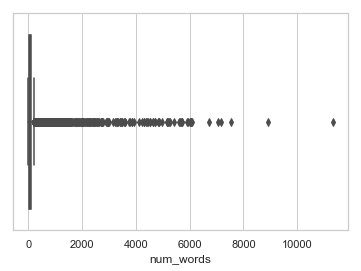

In [104]:
sns.set(style="whitegrid")
sns.boxplot(x=df_lemmatization['num_words'])